<a href="https://colab.research.google.com/github/JazminaNurinNatasya/Kijang-Emas/blob/main/MULTIVARIAT_LSTM_KIJANG_EMAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikeras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
# Import KerasRegressor from scikeras.wrappers
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# Install the necessary modules
!pip install ipywidgets

# Import the necessary modules
import io
import pandas as pd
from ipywidgets import FileUpload

# Create a file upload widget
uploader = FileUpload()
uploader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.7 MB/s eta 0:00:00


FileUpload(value={}, description='Upload')

In [ ]:
# Load the dataset
data = pd.read_csv(io.BytesIO(uploader.data[0]))

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

,oz,exchange,oil
Date,,,
2010-01-04,3669,3.3990,80.12
2010-01-05,3711,3.3875,80.59
2010-01-07,3746,3.3710,81.51
2010-01-08,3717,3.3760,81.37
2010-01-11,3786,3.3365,80.97


In [ ]:
data.shape

(3236, 3)

In [ ]:
test_split=round(len(data)*0.20)
df_for_training=data[:-647]
df_for_testing=data[-647:]
print(df_for_training.shape)
print(df_for_testing.shape)

(2589, 3)
(647, 3)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled=scaler.transform(df_for_testing)
df_for_training_scaled

array([[0.        , 0.29519231, 0.55220864],
       [0.00813638, 0.28782051, 0.55673179],
       [0.0149167 , 0.27724359, 0.5655856 ],
       ...,
       [0.88570322, 0.80320513, 0.21836204],
       [0.91011236, 0.80448718, 0.21739967],
       [0.89190236, 0.80416667, 0.22307766]])

In [ ]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)
trainX,trainY=createXY(df_for_training_scaled,30)
testX,testY=createXY(df_for_testing_scaled,30)

In [ ]:
pip install scikeras

In [ ]:
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [ ]:
def build_model(neurons=50):
    model = Sequential()
    model.add(LSTM(neurons, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Wrap the Keras model
keras_regressor = KerasRegressor(model=build_model, epochs=20, batch_size=32)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'model__neurons': [50, 100],
    'epochs': [20, 30],
    'batch_size': [16, 32]
}

grid_search = GridSearchCV(estimator=keras_regressor, param_grid=param_grid, cv=3)
grid_search.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0232
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0030
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0023
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0016
Epoch 9/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0011
Epoch 10/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013
Epoch 11/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 12/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 13/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 14/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016
Epoch 15/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0305
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0036
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0029
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0025
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0019
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0020
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0018
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0019
Epoch 9/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018
Epoch 10/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017
Epoch 11/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 12/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016
Epoch 13/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013
Epoch 14/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 15/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0147
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0013
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0011
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 9.6704e-04
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.4664e-04
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.8815e-04
Epoch 9/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.9175e-04
Epoch 10/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.2576e-04
Epoch 11/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.1988e-04
Epoch 12/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.6322e-04
Epoch 13/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.1275e-04
Epoch 14/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 5.9231e-04
Epoch 15/20
107/10

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0576
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0028
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0023
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0021
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0020
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0016
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0015
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0015
Epoch 9/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0015
Epoch 10/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0011
Epoch 11/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0014
Epoch 12/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0012
Epoch 13/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0011
Epoch 14/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0012
Epoch 15/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0448
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0034
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0023
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0019
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0018
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0019
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0020
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0015
Epoch 9/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0017
Epoch 10/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0013
Epoch 11/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0012
Epoch 12/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0014
Epoch 13/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0013
Epoch 14/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0013
Epoch 15/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0081
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0013
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0011
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 9.3383e-04
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 9.1975e-04
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 7.2288e-04
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 7.1817e-04
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 6.0706e-04
Epoch 9/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 6.1048e-04
Epoch 10/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 5.2662e-04
Epoch 11/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 5.2533e-04
Epoch 12/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.5154e-04
Epoch 13/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 5.3745e-04
Epoch 14/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 5.4060e-04
Epoch 15/2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0204
Epoch 2/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0030
Epoch 3/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0022
Epoch 4/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0022
Epoch 5/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0023
Epoch 6/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018
Epoch 7/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017
Epoch 8/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017
Epoch 9/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017
Epoch 10/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017
Epoch 11/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 12/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0016
Epoch 13/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0011
Epoch 14/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014
Epoch 15/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0868
Epoch 2/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0049
Epoch 3/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0040
Epoch 4/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0036
Epoch 5/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0029
Epoch 6/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0030
Epoch 7/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0029
Epoch 8/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0021
Epoch 9/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0024
Epoch 10/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0020
Epoch 11/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0021
Epoch 12/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022
Epoch 13/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0019
Epoch 14/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0019
Epoch 15/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0166
Epoch 2/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0023
Epoch 3/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018
Epoch 4/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0014
Epoch 5/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0012
Epoch 6/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 7/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010
Epoch 8/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.6383e-04
Epoch 9/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.8942e-04
Epoch 10/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.5684e-04
Epoch 11/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.6994e-04
Epoch 12/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.3679e-04
Epoch 13/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 7.0667e-04
Epoch 14/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 7.4253e-04
Epoch 15/30
107/107 ━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0368
Epoch 2/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0030
Epoch 3/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0024
Epoch 4/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0023
Epoch 5/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0021
Epoch 6/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0019
Epoch 7/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0015
Epoch 8/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0015
Epoch 9/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0014
Epoch 10/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0014
Epoch 11/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0013
Epoch 12/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0014
Epoch 13/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0013
Epoch 14/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0011
Epoch 15/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0376
Epoch 2/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0025
Epoch 3/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0019
Epoch 4/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0018
Epoch 5/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0015
Epoch 6/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0015
Epoch 7/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0017
Epoch 8/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0012
Epoch 9/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0012
Epoch 10/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0012
Epoch 11/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0013
Epoch 12/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0015
Epoch 13/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0011
Epoch 14/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0010
Epoch 15/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0149
Epoch 2/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0013
Epoch 3/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0010
Epoch 4/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 9.3052e-04
Epoch 5/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 8.7933e-04
Epoch 6/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 7.8445e-04
Epoch 7/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 6.4520e-04
Epoch 8/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.2857e-04
Epoch 9/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 6.2920e-04
Epoch 10/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.7117e-04
Epoch 11/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 6.1633e-04
Epoch 12/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 5.7348e-04
Epoch 13/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2403e-04
Epoch 14/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 5.0507e-04
Epoch 15/3

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0245
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0041
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0035
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0025
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0023
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0025
Epoch 9/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0020
Epoch 10/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0022
Epoch 11/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0021
Epoch 12/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0019
Epoch 13/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0017
Epoch 14/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0018
Epoch 15/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0018
Epoch 16/20
54/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0400
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0063
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0040
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0038
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0030
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0030
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0029
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0024
Epoch 9/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0023
Epoch 10/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0024
Epoch 11/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0021
Epoch 12/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0022
Epoch 13/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0019
Epoch 14/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0018
Epoch 15/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0019
Epoch 16/20
54/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0243
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0056
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0023
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0020
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0015
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0014
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0013
Epoch 9/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0015
Epoch 10/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012
Epoch 11/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011
Epoch 12/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011
Epoch 13/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012
Epoch 14/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011
Epoch 15/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.9429e-04
Epoch 16/20

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0357
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0030
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0023
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0024
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0018
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0018
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0018
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0017
Epoch 9/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0012
Epoch 10/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0015
Epoch 11/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0011
Epoch 12/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0014
Epoch 13/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0015
Epoch 14/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0011
Epoch 15/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0011
Epoch 16/20
54/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0743
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0041
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0026
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0020
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0021
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0016
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0019
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0017
Epoch 9/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0018
Epoch 10/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0015
Epoch 11/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0016
Epoch 12/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0017
Epoch 13/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0015
Epoch 14/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0013
Epoch 15/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0014
Epoch 16/20
54/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0096
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0018
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0012
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0010
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0010
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 9.9840e-04
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8.9864e-04
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.3772e-04
Epoch 9/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.7331e-04
Epoch 10/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.0507e-04
Epoch 11/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.6892e-04
Epoch 12/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.4000e-04
Epoch 13/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.2787e-04
Epoch 14/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 6.2265e-04
Epoch 15/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0511
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0045
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0036
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0039
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0026
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0024
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0023
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0023
Epoch 9/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0023
Epoch 10/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0021
Epoch 11/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0019
Epoch 12/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0019
Epoch 13/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018
Epoch 14/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018
Epoch 15/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0015
Epoch 16/30
54/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0247
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0050
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0027
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0031
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0024
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0026
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0023
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0025
Epoch 9/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0021
Epoch 10/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017
Epoch 11/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0019
Epoch 12/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017
Epoch 13/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017
Epoch 14/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0015
Epoch 15/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0019
Epoch 16/30
54/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0091
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0027
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0018
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0011
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0011
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 9.0931e-04
Epoch 9/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.1150e-04
Epoch 10/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.3457e-04
Epoch 11/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.0867e-04
Epoch 12/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.8791e-04
Epoch 13/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.9404e-04
Epoch 14/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.1057e-04
Epoch 15/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0566
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0029
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0024
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0020
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0018
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0017
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0015
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0021
Epoch 9/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0015
Epoch 10/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0015
Epoch 11/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0014
Epoch 12/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0013
Epoch 13/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0011
Epoch 14/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0013
Epoch 15/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0012
Epoch 16/30
54/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0540
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0036
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0027
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0020
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0021
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0022
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0022
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0017
Epoch 9/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0015
Epoch 10/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0015
Epoch 11/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0015
Epoch 12/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0013
Epoch 13/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0015
Epoch 14/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0012
Epoch 15/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0014
Epoch 16/30
54/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0156
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0017
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0013
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0013
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0011
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.4229e-04
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0010
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.3218e-04
Epoch 9/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 7.6585e-04
Epoch 10/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 7.2174e-04
Epoch 11/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.5692e-04
Epoch 12/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.1687e-04
Epoch 13/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.8702e-04
Epoch 14/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.7515e-04
Epoch 15/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0111
Epoch 2/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0020
Epoch 3/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0016
Epoch 4/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0014
Epoch 5/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0016
Epoch 6/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 9.1733e-04
Epoch 7/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 9.1670e-04
Epoch 8/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 8.6673e-04
Epoch 9/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 7.9047e-04
Epoch 10/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 7.9282e-04
Epoch 11/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 7.5767e-04
Epoch 12/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 7.9478e-04
Epoch 13/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 6.9128e-04
Epoch 14/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 7.0408e-04
Epoch 15/30
160/16

GridSearchCV(cv=3,
             estimator=KerasRegressor(batch_size=32, epochs=20, model=<function build_model at 0x7fbb9411bbe0>),
             param_grid={'batch_size': [16, 32], 'epochs': [20, 30],
                         'model__neurons': [50, 100]})

In [ ]:
grid_search.best_params_

{'batch_size': 16, 'epochs': 30, 'model__neurons': 100}

In [ ]:
my_model=grid_search.best_estimator_.model

In [ ]:
# After fitting the GridSearchCV
my_model = grid_search.best_estimator_.model_ # Access the fitted model directly

# Now you can make predictions
prediction = my_model.predict(testX)
print("prediction\n", prediction)
print("\nPrediction Shape-", prediction.shape)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
prediction
 [[0.8461745 ]
 [0.8513801 ]
 [0.8540931 ]
 [0.8582319 ]
 [0.84881246]
 [0.842389  ]
 [0.8450074 ]
 [0.8568922 ]
 [0.8649142 ]
 [0.8567977 ]
 [0.85125256]
 [0.8492793 ]
 [0.84922826]
 [0.8502686 ]
 [0.85579205]
 [0.8625183 ]
 [0.85973024]
 [0.8557222 ]
 [0.8572216 ]
 [0.8594599 ]
 [0.84480405]
 [0.8369187 ]
 [0.8407347 ]
 [0.853058  ]
 [0.8569751 ]
 [0.86014354]
 [0.8716103 ]
 [0.8467262 ]
 [0.8284823 ]
 [0.8181908 ]
 [0.82014024]
 [0.8267597 ]
 [0.82921314]
 [0.82359433]
 [0.8149854 ]
 [0.8061063 ]
 [0.8042606 ]
 [0.79027736]
 [0.7691283 ]
 [0.7573143 ]
 [0.7507534 ]
 [0.74012566]
 [0.73206854]
 [0.74000216]
 [0.7522061 ]
 [0.7614316 ]
 [0.767854  ]
 [0.7788248 ]
 [0.7872937 ]
 [0.77941227]
 [0.7698556 ]
 [0.7607099 ]
 [0.75602865]
 [0.76323915]
 [0.7731124 ]
 [0.78329194]
 [0.79183674]
 [0.79584205]
 [0.7923119 ]
 [0.79171884]
 [0.7983042 ]
 [0.7981303 ]
 [0.79589283]
 [0.7972481 ]
 [0.8014858 ]
 [0.8137028 ]
 [0.82383084]
 [0.822505

In [ ]:
# Reshape your prediction to have 3 columns (assuming your original data had 3 features)
prediction_reshaped = prediction.reshape(-1, 1)

# Repeat the column 3 times to match the original data shape
prediction_reshaped = np.repeat(prediction_reshaped, 3, axis=1)

# Now apply inverse_transform
inversed_prediction = scaler.inverse_transform(prediction_reshaped)

# If you only need the first column (original prediction):
inversed_prediction = inversed_prediction[:, 0]

In [ ]:
prediction_copies_array = np.repeat(prediction,3, axis=-1)

In [ ]:
prediction_copies_array.shape

(617, 3)

In [ ]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),3)))[:,0]

In [ ]:
original_copies_array = np.repeat(testY,3, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),3)))[:,0]

In [ ]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [8036.952  8063.8237 8077.828  8099.193  8050.57   8017.4116 8030.928
 8092.2773 8133.6865 8091.7896 8063.1655 8052.9795 8052.716  8058.0864
 8086.598  8121.3193 8106.9272 8086.238  8093.9775 8105.5317 8029.8784
 7989.1743 8008.8726 8072.485  8092.705  8109.0605 8168.252  8039.8003
 7945.625  7892.5005 7902.5635 7936.7334 7949.398  7920.3936 7875.954
 7830.1206 7820.593  7748.4116 7639.24   7578.2563 7544.3887 7489.5283
 7447.9375 7488.8906 7551.8877 7599.5093 7632.662  7689.2935 7733.01
 7692.3257 7642.9946 7595.784  7571.6196 7608.8403 7659.806  7712.3525
 7756.461  7777.136  7758.9136 7755.8525 7789.846  7788.948  7777.3984
 7784.3945 7806.2695 7869.3335 7921.6147 7914.7734 7914.3374 7775.0693
 7678.147  7664.531  7650.6333 7638.772  7578.8286 7576.105  7599.3774
 7652.564  7685.963  7688.175  7675.889  7655.1465 7636.6064 7633.3193
 7653.754  7630.6553 7608.279  7529.779  7515.5415 7550.931  7577.157
 7598.901  7563.621  7523.6255 7449.9824 7377.4556 7331.55   7339.9

In [ ]:
# prompt: data frame actual vs predicted

# Create a DataFrame for actual vs. predicted values
df_compare = pd.DataFrame({'Actual': original, 'Predicted': pred})
# Print the DataFrame
df_compare.head(10)

,Actual,Predicted
0,8063.0,8036.952148
1,8057.0,8063.823730
2,8096.0,8077.828125
3,7967.0,8099.192871
4,7986.0,8050.569824
5,8038.0,8017.411621
6,8128.0,8030.928223
7,8124.0,8092.277344
8,8003.0,8133.686523
9,8031.0,8091.789551


In [ ]:
df_compare.tail(10)

,Actual,Predicted
607,9053.0,9050.954102
608,9134.0,9070.258789
609,9008.0,9113.069336
610,8992.0,9090.976562
611,9050.0,9064.144531
612,9017.0,9077.121094
613,8990.0,9077.170898
614,9093.0,9059.616211
615,9049.0,9094.247070
616,9024.0,9104.825195


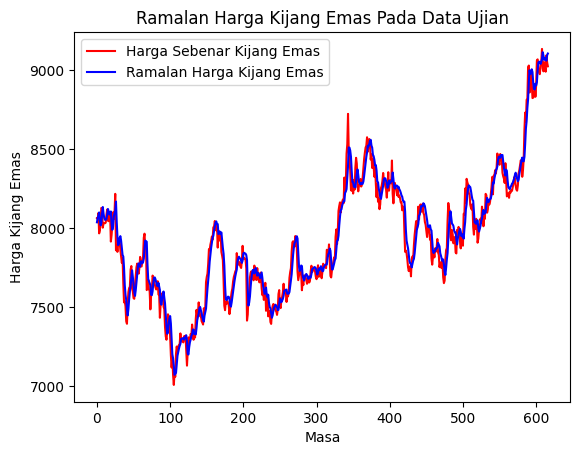

In [ ]:
plt.plot(original, color = 'red', label = 'Harga Sebenar Kijang Emas')
plt.plot(pred, color = 'blue', label = 'Ramalan Harga Kijang Emas')
plt.title('Ramalan Harga Kijang Emas Pada Data Ujian')
plt.xlabel('Masa')
plt.ylabel('Harga Kijang Emas')
plt.legend()
plt.show()

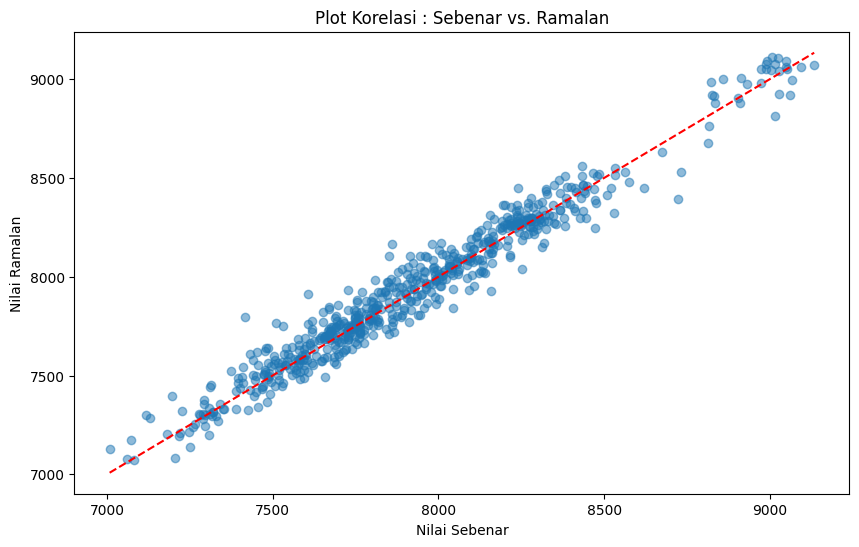

In [ ]:
# prompt: cor plot actual vs predicted

plt.figure(figsize=(10, 6))
plt.scatter(original, pred, alpha=0.5)
plt.xlabel("Nilai Sebenar")
plt.ylabel("Nilai Ramalan")
plt.title("Plot Korelasi : Sebenar vs. Ramalan")
plt.plot([min(original), max(original)], [min(original), max(original)], color='red', linestyle='--') # Add a diagonal line
plt.show()

In [ ]:
# prompt: correlation value and rsquared value

import numpy as np
from scipy.stats import pearsonr

# Calculate the correlation coefficient
correlation_coefficient, p_value = pearsonr(original, pred)
print(f"Pekali korelasi: {correlation_coefficient}")

# Calculate R-squared
# R-squared is the square of the correlation coefficient
r_squared = correlation_coefficient**2
print(f"R-squared: {r_squared}")

Pekali korelasi: 0.9786869410341553
R-squared: 0.9578281285507922


In [ ]:
df_30_days_past=data.iloc[-30:,:]
df_30_days_past.tail()

,oz,exchange,oil
Date,,,
2023-04-20,9017,4.4355,80.81
2023-04-25,8990,4.4495,80.60
2023-04-26,9093,4.4575,77.72
2023-04-27,9049,4.4590,78.22
2023-04-28,9024,4.4585,80.33


In [ ]:
df_30_days_future=pd.read_csv("Book1.csv",parse_dates=["Date"],index_col=[0])
df_30_days_future.head()

,exchange,oil
Date,,
2/5/2023,4.460,75.04
3/5/2023,4.450,72.18
4/5/2023,4.435,72.32
5/5/2023,4.435,75.09
8/5/2023,4.470,76.81


In [ ]:
df_30_days_future["oz"]=0
df_30_days_future=df_30_days_future[["oz","exchange","oil"]]
old_scaled_array=scaler.transform(df_30_days_past)
new_scaled_array=scaler.transform(df_30_days_future)
new_scaled_df=pd.DataFrame(new_scaled_array)
new_scaled_df.iloc[:,0]=np.nan
full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)

In [ ]:
full_df_scaled_array=full_df.values
all_data=[]
time_step=30
for i in range(time_step,len(full_df_scaled_array)):
    data_x=[]
    data_x.append(
     full_df_scaled_array[i-time_step :i , 0:full_df_scaled_array.shape[1]])
    data_x=np.array(data_x)
    prediction=my_model.predict(data_x)
    all_data.append(prediction)
    full_df.iloc[i,0]=prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [ ]:
new_array=np.array(all_data)
new_array=new_array.reshape(-1,1)
prediction_copies_array = np.repeat(new_array,3, axis=-1)
y_pred_future_30_days = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(new_array),3)))[:,0]
print(y_pred_future_30_days)

[ 9091.297  9114.299  9143.287  9169.73   9195.292  9224.406  9263.181
  9288.554  9317.199  9348.988  9379.229  9413.193  9446.721  9480.797
  9516.074  9553.216  9591.948  9633.337  9671.567  9710.116  9747.952
  9789.128  9830.139  9866.183  9902.671  9942.508  9980.955 10021.947
 10062.457]


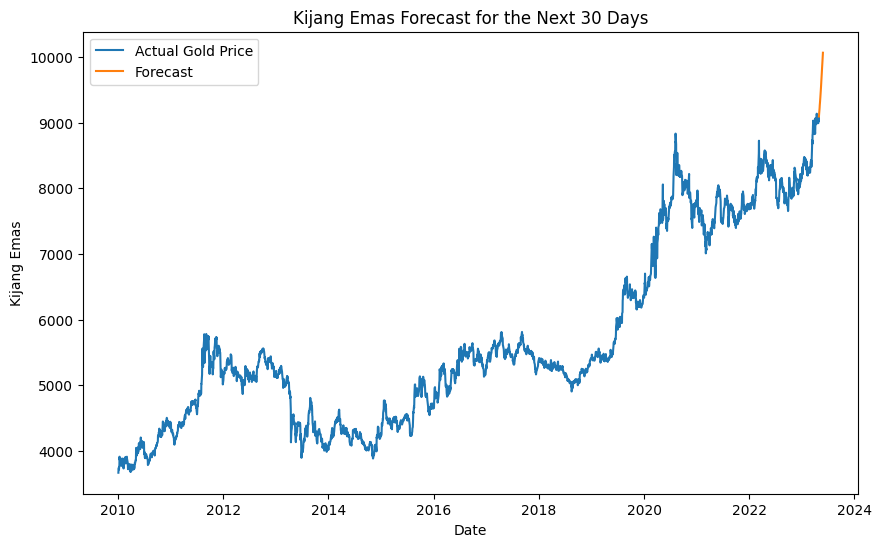

In [ ]:
# Convert the NumPy array to a Pandas Series with a date range as index.
# Assuming 'data' DataFrame has a DatetimeIndex named 'Date'
y_pred_future_30_days = pd.Series(y_pred_future_30_days,
                                  index=pd.date_range(start=data.index[-1] + pd.Timedelta(days=1),
                                                      periods=len(y_pred_future_30_days),
                                                      freq='D'),
                                  name='Predicted Price')
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['oz'], label='Actual Gold Price')
plt.plot(y_pred_future_30_days, label='Forecast') # Changed to directly use the Series
plt.title('Kijang Emas Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Kijang Emas')
plt.legend()
plt.show()